CCA 2021 term project

In [ ]:
# import libraries 
from sklearn import datasets, linear_model, cross_decomposition, manifold
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.colors import ListedColormap

np.set_printoptions(precision=4, suppress=True, floatmode='fixed')

breast_cancer data
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**
<details>
<summary>정보 더보기</summary>
<div markdown="1">

    :Number of Instances: 569
    :Number of Attributes: 30 numeric, predictive attributes and the class
        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

</div>
</details>






In [ ]:
# import breast_cancer data
breast_cancer = datasets.load_breast_cancer()
data = breast_cancer.data
features = breast_cancer.feature_names

print("Number of samples : ", data.shape[0])
print("Number of features : ", features.size)

Number of samples :  569
Number of features :  30


In [ ]:
breast_cancer_x_train = data[:-30]
breast_cancer_y_train = breast_cancer.target[:-30]
breast_cancer_x_test = data[-30:]
breast_cancer_y_test = breast_cancer.target[-30:]

In [ ]:
pca = PCA(n_components=2)
pca.fit(breast_cancer_x_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

pca 결과 분석

In [ ]:
print(pca.explained_variance_ratio_)

[0.9815 0.0167]


In [ ]:
df_pca_component = pd.DataFrame(data = pca.components_, columns=features)

df_pca_component.to_csv("pca_components.csv")

In [ ]:
pc1_feature = list(zip(pca.components_[0], features))
pc1_feature.sort()
pc1_feature

for i in range(29, 0, -1):
    print("{: .4f} {:s}".format(*pc1_feature[i]), end='\n')

 0.8535 worst area
 0.5145 mean area
 0.0560 area error
 0.0491 worst perimeter
 0.0347 mean perimeter
 0.0071 worst radius
 0.0050 mean radius
 0.0032 worst texture
 0.0023 mean texture
 0.0022 perimeter error
 0.0003 radius error
 0.0002 worst concavity
 0.0001 worst compactness
 0.0001 mean concavity
 0.0001 worst concave points
 0.0000 mean concave points
 0.0000 mean compactness
 0.0000 worst symmetry
 0.0000 concavity error
 0.0000 mean symmetry
 0.0000 worst smoothness
 0.0000 compactness error
 0.0000 mean smoothness
 0.0000 concave points error
 0.0000 worst fractal dimension
-0.0000 fractal dimension error
-0.0000 smoothness error
-0.0000 symmetry error
-0.0000 mean fractal dimension


In [ ]:
pc2_feature = list(zip(pca.components_[1], features))
pc2_feature.sort()
pc2_feature

for i in range(29, 0, -1):
    print("{: .4f} {:s}".format(*pc2_feature[i]), end='\n')

 0.8533 mean area
 0.0619 mean perimeter
 0.0095 area error
 0.0092 mean radius
 0.0008 perimeter error
 0.0004 texture error
 0.0001 mean concavity
 0.0000 mean concave points
 0.0000 concavity error
 0.0000 symmetry error
 0.0000 compactness error
 0.0000 concave points error
 0.0000 smoothness error
 0.0000 fractal dimension error
-0.0000 mean compactness
-0.0000 mean fractal dimension
-0.0000 mean smoothness
-0.0000 mean symmetry
-0.0000 worst concave points
-0.0000 radius error
-0.0001 worst fractal dimension
-0.0001 worst smoothness
-0.0002 worst symmetry
-0.0002 worst concavity
-0.0003 worst compactness
-0.0007 worst radius
-0.0015 worst perimeter
-0.0033 mean texture
-0.0137 worst texture


##PCA 결과 분석
###explaination
PC1과 PC2 만으로도 데이터의 0.99를 설명 가능

###Component 분석
PC1에게 그나마 영향을 주는 것들은 worst ...

worst fractal dimension > worst symmetry > worst concave points > worst concavity > worst compactness > worst smoothness > worst area > worst perimeter > worst texture > worst radius


PC2는 더 없음

+효과
mean area > mean perimeter > area error > mean radius

-효과
worst area > worst texture


###위에 효과 있는 것들을 데이터에서 제외하고 다시 pca fit해도 비슷한 결과가 나오는지 확인 필요.

In [ ]:
train_pc_x = pca.transform(breast_cancer_x_train)
df_train_pc_x = pd.DataFrame(data = train_pc_x[:, :2]
             , columns = ['PC1', 'PC2'])
df_train_y = pd.DataFrame(data = breast_cancer_y_train, columns=['target'])
df_train_pc = pd.concat([df_train_pc_x, df_train_y], axis = 1)

In [ ]:
test_pc_x = pca.transform(breast_cancer_x_test)
df_test_pc_x = pd.DataFrame(data = test_pc_x[:, :2]
             , columns = ['PC1', 'PC2'])
df_test_y = pd.DataFrame(data = breast_cancer_y_test, columns=['target'])
df_test_pc = pd.concat([df_test_pc_x, df_test_y], axis = 1)

In [ ]:
pc_x = pca.transform(data)
# df_pc_x = pd.DataFrame(data = test_pc_x[:, :3]
#              , columns = ['PC1', 'PC2', 'PC3'])

In [ ]:
df_test_pc

,PC1,PC2,target
0,-826.309360,-75.977580,1
1,-504.203479,3.144943,1
2,-71.443488,38.887952,1
3,-50.322697,40.217405,1
4,-286.888352,30.184038,1
5,-211.914339,39.791542,1
6,-182.411249,8.425331,1
7,-607.698697,-26.377879,1
8,-633.580882,-15.672421,1
9,-645.471080,-49.393640,1


In [ ]:
df_train_pc

,PC1,PC2,target
0,1150.396002,-290.124890,0
1,1258.518966,19.611401,0
2,985.133692,42.432161,0
3,-417.545676,-67.957983,0
4,919.267767,192.444952,0
...,...,...,...
534,-567.156128,-3.103091,1
535,1124.812934,80.705891,0
536,-154.705470,57.710630,0
537,-476.387459,-9.446626,1


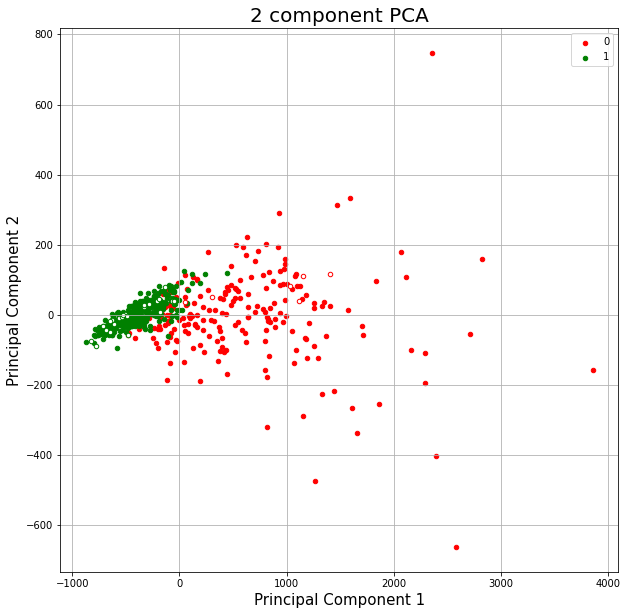

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g']
targets = [0, 1]
for target, color in zip(targets,colors):
    indicesToKeep = df_train_pc['target'] == target
    ax.scatter(df_train_pc.loc[indicesToKeep, 'PC1']
               , df_train_pc.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 20)
    
for target, color in zip(targets,colors):
    indicesToKeep = df_test_pc['target'] == target
    ax.scatter(df_test_pc.loc[indicesToKeep, 'PC1']
               , df_test_pc.loc[indicesToKeep, 'PC2']
               , edgecolor = color
               , c = 'w'
               , s = 20)
ax.legend(targets)
ax.grid()

In [ ]:
lasso           = linear_model.Lasso()
ridge           = linear_model.Ridge()
logisticRegr    = linear_model.LogisticRegression(solver = 'lbfgs')

lasso.fit(train_pc_x, breast_cancer_y_train)
ridge.fit(train_pc_x, breast_cancer_y_train)
logisticRegr.fit(train_pc_x, breast_cancer_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_pc_x

array([[1150.3960, -290.1249],
       [1258.5190,   19.6114],
       [ 985.1337,   42.4322],
       ...,
       [-154.7055,   57.7106],
       [-476.3875,   -9.4466],
       [-800.6263,  -81.3770]])

In [ ]:
r2_lasso =  lasso.score(test_pc_x, breast_cancer_y_test)
r2_ridge =  ridge.score(test_pc_x, breast_cancer_y_test)
r2_logisticRegr =  logisticRegr.score(test_pc_x, breast_cancer_y_test)

In [ ]:
print(r2_lasso, r2_ridge, r2_logisticRegr)

0.7125322255603102 0.7155915671859474 1.0


In [ ]:
print(lasso.coef_)
print(ridge.coef_)
print(logisticRegr.coef_)

[-0.0005  0.0001]
[-0.0005  0.0002]
[[-0.0121  0.0308]]


In [ ]:
logistic_predict = logisticRegr.predict(test_pc_x)
print(logistic_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1]


In [ ]:
logistic_predict_train = logisticRegr.predict(train_pc_x)
# print(logistic_predict_train)
print(len(logistic_predict_train))

539


In [ ]:
lasso_predict = lasso.predict(test_pc_x)
lasso_predict_cor = []
for target in lasso_predict:
    if target >= 0.5:
      lasso_predict_cor.append(1)
    else: 
      lasso_predict_cor.append(0)
print(lasso_predict_cor)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]


In [ ]:
lasso_predict_train = lasso.predict(train_pc_x)
print(len(lasso_predict_train))

539


In [ ]:
# rounding for lasso regression prediction of train data
lasso_predict_train_cor = []
for target in lasso_predict_train:
    if target >= 0.5:
        lasso_predict_train_cor.append(1)
    else:
        lasso_predict_train_cor.append(0)
print(lasso_predict_train_cor)
print(len(lasso_predict_train_cor))

[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 

In [ ]:
# rounding for lasso regression prediction of test data
ridge_predict = ridge.predict(test_pc_x)
ridge_predict_cor = []
for target in ridge_predict:
    if target >= 0.5:
        ridge_predict_cor.append(1)
    else:
        ridge_predict_cor.append(0)
print(ridge_predict)
print(ridge_predict_cor)

[ 1.0386  0.8850  0.6638  0.6529  0.7759  0.7382  0.7160  0.9335  0.9495
  0.9486  0.8615  0.9146  0.8992  0.7983  0.9891  0.7972  0.9491  0.9558
  0.9685  0.7063  0.8757  0.7264  0.8967  0.5983  0.0296 -0.0998  0.0880
  0.4675  0.0367  1.0121]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]


In [ ]:
ridge_predict_train = ridge.predict(train_pc_x)
print(len(ridge_predict_train))

539


In [ ]:
ridge_predict_train_cor = []
for target in ridge_predict_train:
    if target >= 0.5:
        ridge_predict_train_cor.append(1)
    else:
        ridge_predict_train_cor.append(0)
print(ridge_predict_train_cor)
print(len(ridge_predict_train_cor))

[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 

In [ ]:
# mse
print('Mean squared error of Logistic regression: %f' % mean_squared_error(breast_cancer_y_test, logistic_predict))

# before correction
print('Mean squared error of Lasso regression: %f' % mean_squared_error(breast_cancer_y_test, lasso_predict))
print('Mean squared error of Ridge regression: %f' % mean_squared_error(breast_cancer_y_test, ridge_predict))

#after correction
print('Mean squared error of Lasso regression: %f' % mean_squared_error(breast_cancer_y_test, lasso_predict_cor))
print('Mean squared error of Ridge regression: %f' % mean_squared_error(breast_cancer_y_test, ridge_predict_cor))

Mean squared error of Logistic regression: 0.000000
Mean squared error of Lasso regression: 0.045995
Mean squared error of Ridge regression: 0.045505
Mean squared error of Lasso regression: 0.033333
Mean squared error of Ridge regression: 0.033333


In [ ]:
breast_cancer_y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
df_test_feature = pd.DataFrame(data = breast_cancer_x_test, columns= breast_cancer.feature_names)
df_test_target = pd.DataFrame(data = breast_cancer_y_test, columns= ['target'])
df_test_logistic = pd.DataFrame(data = logistic_predict, columns= ['Logistic target'])
df_test_lasso = pd.DataFrame(data = lasso_predict_cor, columns= ['Lasso target'])
df_test_ridge = pd.DataFrame(data = ridge_predict_cor, columns= ['Ridge target'])
df_test = pd.concat([df_test_feature, df_test_target, df_test_logistic, df_test_lasso, df_test_ridge], axis= 1)

In [ ]:
df_train_feature = pd.DataFrame(data = breast_cancer_x_train, columns= breast_cancer.feature_names)
df_train_target = pd.DataFrame(data = breast_cancer_y_train, columns= ['target'])

In [ ]:
# wrong prediction in logistic

df_train_logistic = pd.DataFrame(data = logistic_predict_train, columns= ['Logistic target'])
df_train_wrong_logistic = pd.concat([df_train_feature, df_train_target, df_train_logistic], axis= 1)

idx = df_train_wrong_logistic[df_train_wrong_logistic['target'] == df_train_wrong_logistic['Logistic target']].index
df_train_wrong_logistic = df_train_wrong_logistic.drop(idx)

In [ ]:
df_train_wrong_logistic

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Logistic target
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.059630,0.009208,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0,1
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.029810,0.003002,16.84,27.66,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287,0,1
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,0.2121,1.1690,2.061,19.21,0.006429,0.059360,0.05501,0.016280,0.019610,0.008093,15.03,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310,0,1
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,0.2860,1.0190,2.657,24.91,0.005878,0.029950,0.04815,0.011610,0.020280,0.004022,15.89,30.36,116.20,799.6,0.14460,0.42380,0.51860,0.14470,0.3591,0.10140,0,1
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.00,0.006883,0.010940,0.01818,0.019170,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0,1
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,0.2130,0.5914,1.545,18.52,0.005367,0.022390,0.03049,0.012620,0.013770,0.003187,15.53,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,0,1
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,0.2366,1.4280,1.822,16.97,0.008064,0.017640,0.02595,0.010370,0.013570,0.003040,12.84,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606,0,1
44,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,0.1938,0.6123,1.334,14.49,0.003350,0.013840,0.01452,0.006853,0.011130,0.001720,16.23,29.89,105.50,740.7,0.15030,0.39040,0.37280,0.16070,0.3693,0.09618,0,1
86,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,0.4204,2.2200,3.301,38.87,0.009369,0.029830,0.05371,0.017610,0.024180,0.003249,16.21,29.25,108.40,808.9,0.13060,0.19760,0.33490,0.12250,0.3020,0.06846,0,1
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,0.3129,0.8413,2.075,29.44,0.009882,0.024440,0.04531,0.017630,0.024710,0.002142,16.43,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828,0,1


In [ ]:
# wrong prediction in lasso

df_train_lasso = pd.DataFrame(data = lasso_predict_train_cor, columns= ['Lasso target'])
df_train_wrong_lasso = pd.concat([df_train_feature, df_train_target, df_train_lasso], axis= 1)

idx = df_train_wrong_lasso[df_train_wrong_lasso['target'] == df_train_wrong_lasso['Lasso target']].index
df_train_wrong_lasso = df_train_wrong_lasso.drop(idx)

In [ ]:
df_train_wrong_lasso

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Lasso target
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,0.4751,1.5280,2.974,39.05,0.009680,0.03856,0.03476,0.016160,0.02434,0.006995,16.01,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.1521,0.3651,0.11830,0,1
509,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,0.3331,1.9610,2.937,32.52,0.009538,0.04940,0.06019,0.020410,0.02105,0.006000,17.11,36.33,117.70,909.4,0.1732,0.4967,0.5911,0.2163,0.3013,0.10670,0,1
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.02265,0.03452,0.013340,0.01705,0.004005,16.41,29.66,113.30,844.4,0.1574,0.3856,0.5106,0.2051,0.3585,0.11090,0,1
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,0.3860,1.1980,2.630,38.49,0.004952,0.01630,0.02967,0.009423,0.01152,0.001718,17.58,28.06,113.80,967.0,0.1246,0.2101,0.2866,0.1120,0.2282,0.06954,0,1


In [ ]:
# worng prediction in ridge
df_train_feature = pd.DataFrame(data = breast_cancer_x_train, columns= breast_cancer.feature_names)
df_train_target = pd.DataFrame(data = breast_cancer_y_train, columns= ['target'])


#df_train_lasso = pd.DataFrame(data = lasso_predict_train_cor, columns= ['Lasso target'])
df_train_ridge = pd.DataFrame(data = ridge_predict_train_cor, columns= ['Ridge target'])
df_train_wrong_ridge = pd.concat([df_train_feature, df_train_target, df_train_ridge], axis= 1)

idx = df_train_wrong_ridge[df_train_wrong_ridge['target'] == df_train_wrong_ridge['Ridge target']].index
df_train_wrong_ridge = df_train_wrong_ridge.drop(idx)

In [ ]:
df_train_wrong_ridge

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Ridge target
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,0.4751,1.5280,2.974,39.05,0.009680,0.03856,0.03476,0.016160,0.02434,0.006995,16.01,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.1521,0.3651,0.11830,0,1
509,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,0.3331,1.9610,2.937,32.52,0.009538,0.04940,0.06019,0.020410,0.02105,0.006000,17.11,36.33,117.70,909.4,0.1732,0.4967,0.5911,0.2163,0.3013,0.10670,0,1
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.02265,0.03452,0.013340,0.01705,0.004005,16.41,29.66,113.30,844.4,0.1574,0.3856,0.5106,0.2051,0.3585,0.11090,0,1
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,0.3860,1.1980,2.630,38.49,0.004952,0.01630,0.02967,0.009423,0.01152,0.001718,17.58,28.06,113.80,967.0,0.1246,0.2101,0.2866,0.1120,0.2282,0.06954,0,1


In [ ]:
# ambiguous values of lasso prediction
df_train_feature = pd.DataFrame(data = breast_cancer_x_train, columns= breast_cancer.feature_names)
df_train_target = pd.DataFrame(data = breast_cancer_y_train, columns= ['target'])

#df_train_logistic = pd.DataFrame(data = logistic_predict_train, columns= ['Logistic target'])

df_train_lasso = pd.DataFrame(data = lasso_predict_train, columns= ['Lasso target'])
#df_test_ridge = pd.DataFrame(data = ridge_predict_cor, columns= ['Ridge target'])
df_train_wrong_lasso = pd.concat([df_train_feature, df_train_target, df_train_lasso], axis= 1)

idx = df_train_wrong_lasso[df_train_wrong_lasso['Lasso target'] > 0.55].index
df_train_wrong_lasso = df_train_wrong_lasso.drop(idx)
idx = df_train_wrong_lasso[df_train_wrong_lasso['Lasso target'] < 0.45].index
df_train_wrong_lasso = df_train_wrong_lasso.drop(idx)

In [ ]:
df_train_wrong_lasso

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Lasso target
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.014600,0.003042,19.19,33.88,123.8,1150.0,0.11810,0.1551,0.1459,0.09975,0.2948,0.08452,0,0.461654
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.011620,0.01998,0.011090,0.014100,0.002085,19.07,30.88,123.4,1138.0,0.14640,0.1871,0.2914,0.16090,0.3029,0.08216,0,0.490585
54,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.010300,0.01603,0.009222,0.010950,0.001629,18.10,31.69,117.7,1030.0,0.13890,0.2057,0.2712,0.15300,0.2675,0.07873,0,0.538317
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,0.4768,0.9644,3.706,47.14,0.009250,0.037150,0.04867,0.018510,0.014980,0.003520,18.23,24.23,123.5,1025.0,0.15510,0.4203,0.5203,0.21150,0.2834,0.08234,0,0.541569
117,14.87,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,0.4266,0.9489,2.989,41.18,0.006985,0.025630,0.03011,0.012710,0.016020,0.003884,18.81,27.37,127.1,1095.0,0.18780,0.4480,0.4704,0.20270,0.3585,0.10650,0,0.512056
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.014840,0.02813,0.010930,0.013970,0.002461,19.26,26.00,124.9,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019,0,0.468453
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,0.4789,2.0600,3.479,46.61,0.003443,0.026610,0.03056,0.011100,0.015200,0.001519,18.22,28.07,120.3,1032.0,0.08774,0.1710,0.1882,0.08436,0.2527,0.05972,1,0.502582
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,0.4209,0.6583,2.805,44.64,0.005393,0.023210,0.04303,0.013200,0.017920,0.004168,18.79,17.04,125.0,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100,0,0.497493
177,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,0.3037,1.2840,2.482,31.59,0.006627,0.040940,0.05371,0.018130,0.016820,0.004584,17.79,28.45,123.5,981.2,0.14150,0.4667,0.5862,0.20350,0.3054,0.09519,0,0.537444
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.015970,0.02000,0.007303,0.015220,0.001976,18.33,30.12,117.9,1044.0,0.15520,0.4056,0.4967,0.18380,0.4753,0.10130,0,0.546063


In [ ]:
# ambiguous values of ridge prediction
df_train_feature = pd.DataFrame(data = breast_cancer_x_train, columns= breast_cancer.feature_names)
df_train_target = pd.DataFrame(data = breast_cancer_y_train, columns= ['target'])

df_train_ridge = pd.DataFrame(data = ridge_predict_train, columns= ['Ridge target'])
df_train_wrong_ridge = pd.concat([df_train_feature, df_train_target, df_train_ridge], axis= 1)

idx = df_train_wrong_ridge[df_train_wrong_ridge['Ridge target'] > 0.55].index
df_train_wrong_ridge = df_train_wrong_ridge.drop(idx)
idx = df_train_wrong_ridge[df_train_wrong_ridge['Ridge target'] < 0.45].index
df_train_wrong_ridge = df_train_wrong_ridge.drop(idx)

In [ ]:
df_train_wrong_ridge

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Ridge target
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.014600,0.003042,19.19,33.88,123.8,1150.0,0.11810,0.1551,0.1459,0.09975,0.2948,0.08452,0,0.458828
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.011620,0.01998,0.011090,0.014100,0.002085,19.07,30.88,123.4,1138.0,0.14640,0.1871,0.2914,0.16090,0.3029,0.08216,0,0.475902
54,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.010300,0.01603,0.009222,0.010950,0.001629,18.10,31.69,117.7,1030.0,0.13890,0.2057,0.2712,0.15300,0.2675,0.07873,0,0.534389
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,0.4768,0.9644,3.706,47.14,0.009250,0.037150,0.04867,0.018510,0.014980,0.003520,18.23,24.23,123.5,1025.0,0.15510,0.4203,0.5203,0.21150,0.2834,0.08234,0,0.537245
117,14.87,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,0.4266,0.9489,2.989,41.18,0.006985,0.025630,0.03011,0.012710,0.016020,0.003884,18.81,27.37,127.1,1095.0,0.18780,0.4480,0.4704,0.20270,0.3585,0.10650,0,0.500207
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.014840,0.02813,0.010930,0.013970,0.002461,19.26,26.00,124.9,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019,0,0.459763
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,0.4789,2.0600,3.479,46.61,0.003443,0.026610,0.03056,0.011100,0.015200,0.001519,18.22,28.07,120.3,1032.0,0.08774,0.1710,0.1882,0.08436,0.2527,0.05972,1,0.517317
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,0.4209,0.6583,2.805,44.64,0.005393,0.023210,0.04303,0.013200,0.017920,0.004168,18.79,17.04,125.0,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100,0,0.491281
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.015970,0.02000,0.007303,0.015220,0.001976,18.33,30.12,117.9,1044.0,0.15520,0.4056,0.4967,0.18380,0.4753,0.10130,0,0.533294
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,0.5648,1.9300,3.909,52.72,0.008824,0.031080,0.03112,0.012910,0.019980,0.004506,19.20,41.85,128.5,1153.0,0.22260,0.5209,0.4646,0.20130,0.4432,0.10860,0,0.475085


In [ ]:
# rounding for lasso regression prediction of train data
df_feature = pd.DataFrame(data = data, columns=features)

lasso_predict = lasso.predict(pc_x)
lasso_predict_cor = []
for target in lasso_predict:
    if target >= 0.5:
        lasso_predict_cor.append(1)
    else:
        lasso_predict_cor.append(0)

ridge_predict = ridge.predict(pc_x)
ridge_predict_cor = []
for target in ridge_predict:
    if target >= 0.5:
        ridge_predict_cor.append(1)
    else:
        ridge_predict_cor.append(0)

logistic_predict = logisticRegr.predict_proba(pc_x)[:, 1]
logistic_predict_cor = []
for target in logistic_predict:
    if target >= 0.5:
        logistic_predict_cor.append(1)
    else:
        logistic_predict_cor.append(0)

df_pc_x = pd.DataFrame(data = pc_x[:, :2]
             , columns = ['PC1', 'PC2'])
df_y = pd.DataFrame(data = breast_cancer.target, columns=['target'])
df_lasso_predict = pd.DataFrame(data = lasso_predict_cor, columns=['lasso_predict'])
df_lasso = pd.DataFrame(data = lasso_predict, columns=['lasso'])
df_ridge_predict = pd.DataFrame(data = ridge_predict_cor, columns=['ridge_predict'])
df_ridge = pd.DataFrame(data = ridge_predict, columns=['ridge'])
df_logistic_predict = pd.DataFrame(data = logistic_predict_cor, columns=['logistic_predict'])
df_logistic = pd.DataFrame(data = logistic_predict, columns=['logistic'])
df_all = pd.concat([df_feature, df_pc_x, df_y, 
                   df_lasso, df_lasso_predict, 
                   df_ridge, df_ridge_predict, 
                   df_logistic, df_logistic_predict],
                   axis = 1)

In [ ]:
df_all.to_csv('all.csv')

In [ ]:
print(lasso.coef_)
print(ridge.coef_)

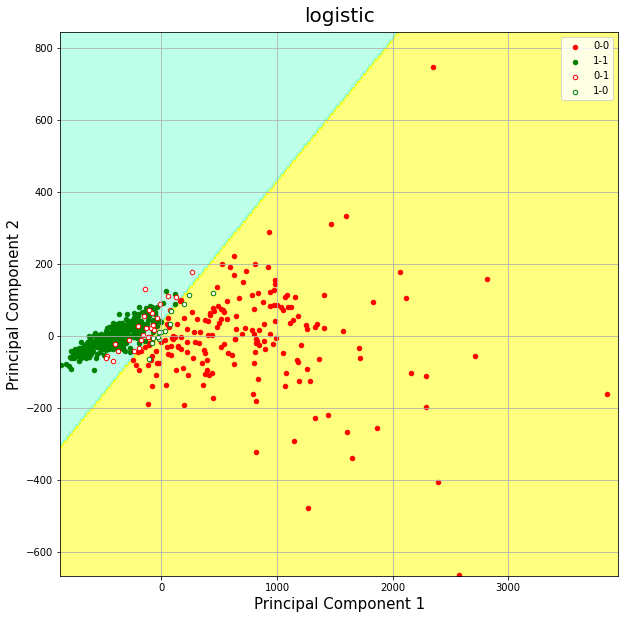

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('logistic', fontsize = 20, pad=10)
colors = ['r', 'g']
targets = [0, 1]

X_set, y_set = pc_x, breast_cancer.target
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 100, step = 10),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 100, step = 10))
  
plt.contourf(X1, X2, logisticRegr.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape) -0.5, alpha = 0.5,
             cmap = ListedColormap(('yellow','yellow', 'aquamarine')))

scatters = list()
  
for target, color in zip(targets,colors):
    indicesToKeep = df_all['target'] == target
    correct = df_all['target'] == df_all['logistic_predict']
    scatters.append(
        ax.scatter(df_all.loc[indicesToKeep & correct, 'PC1']
               , df_all.loc[indicesToKeep & correct, 'PC2']
               , c = color
               , s = 20))
    
for target, color in zip(targets,colors):
    indicesToKeep = df_all['target'] == target
    wrong = df_all['target'] != df_all['logistic_predict']
    scatters.append(
        ax.scatter(df_all.loc[indicesToKeep & wrong, 'PC1']
               , df_all.loc[indicesToKeep & wrong, 'PC2']
               , edgecolor = color
               , c = 'w'
               , s = 20))
    
ax.legend(scatters, ['0-0', '1-1', '0-1', '1-0'])

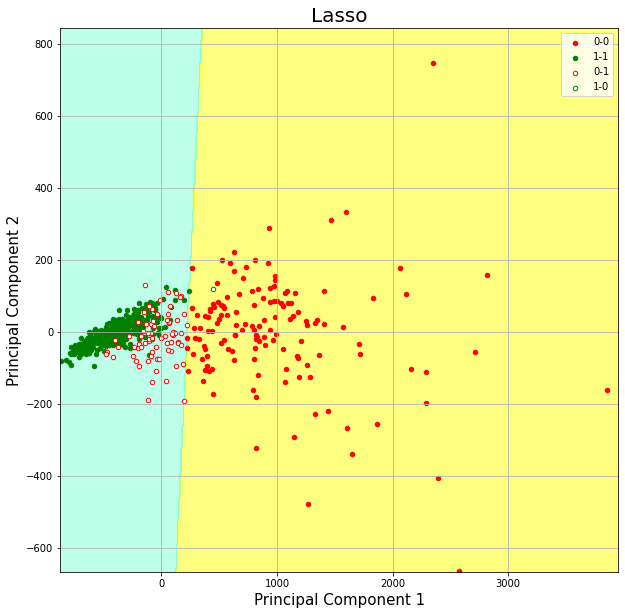

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Lasso', fontsize = 20)
colors = ['r', 'g']
targets = [0, 1]



X_set, y_set = pc_x, breast_cancer.target
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 100, step = 10),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 100, step = 10))

predict = lasso.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
predict[predict < 0.5] = 0
predict[predict >= 0.5] = 1
  
plt.contourf(X1, X2, predict, alpha = 0.5,
             cmap = ListedColormap(('yellow','aquamarine')))
  

scatters = list()
  
for target, color in zip(targets,colors):
    indicesToKeep = df_all['target'] == target
    correct = df_all['target'] == df_all['lasso_predict']
    scatters.append(
        ax.scatter(df_all.loc[indicesToKeep & correct, 'PC1']
               , df_all.loc[indicesToKeep & correct, 'PC2']
               , c = color
               , s = 20))
    
for target, color in zip(targets,colors):
    indicesToKeep = df_all['target'] == target
    wrong = df_all['target'] != df_all['lasso_predict']
    scatters.append(
        ax.scatter(df_all.loc[indicesToKeep & wrong, 'PC1']
               , df_all.loc[indicesToKeep & wrong, 'PC2']
               , edgecolor = color
               , c = 'w'
               , s = 20))
    
ax.legend(scatters, ['0-0', '1-1', '0-1', '1-0'])

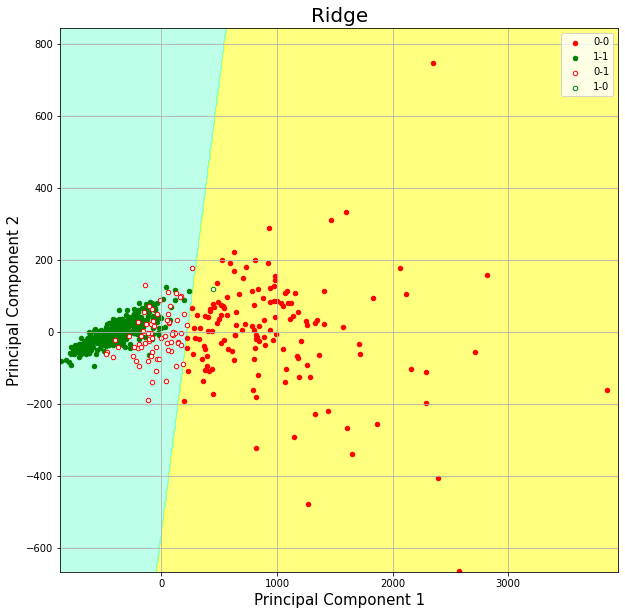

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Ridge', fontsize = 20)
colors = ['r', 'g']
targets = [0, 1]



X_set, y_set = pc_x, breast_cancer.target
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 100, step = 10),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 100, step = 10))

predict = ridge.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
predict[predict < 0.5] = 0
predict[predict >= 0.5] = 1
  
plt.contourf(X1, X2, predict, alpha = 0.5,
             cmap = ListedColormap(('yellow','aquamarine')))
  
scatters = list()
  
for target, color in zip(targets,colors):
    indicesToKeep = df_all['target'] == target
    correct = df_all['target'] == df_all['ridge_predict']
    scatters.append(
        ax.scatter(df_all.loc[indicesToKeep & correct, 'PC1']
               , df_all.loc[indicesToKeep & correct, 'PC2']
               , c = color
               , s = 20))
    
for target, color in zip(targets,colors):
    indicesToKeep = df_all['target'] == target
    wrong = df_all['target'] != df_all['ridge_predict']
    scatters.append(
        ax.scatter(df_all.loc[indicesToKeep & wrong, 'PC1']
               , df_all.loc[indicesToKeep & wrong, 'PC2']
               , edgecolor = color
               , c = 'w'
               , s = 20))
    
ax.legend(scatters, ['0-0', '1-1', '0-1', '1-0'])

In [ ]:
X_set, y_set = pc_x, breast_cancer.target
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 10),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 10))

In [ ]:
X1

In [ ]:
print(lasso.coef_)
0.5 = -0.0005x_1 + 0.0001x_2 + 0.6178107606679035

In [ ]:
print(lasso.intercept_)